In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [46]:


simdf = pd.read_csv("data/soc/30/sim.csv")
predf = pd.read_csv("data/soc/30/pre.csv")

simdf

,time,Pbatt,q,der(q),Soc
0,30,0,0,0,1
1,31,350,0,6.536227204,1
2,32,350,6.536227204,6.536227204,0.999990922
3,33,350,13.07245441,6.536227204,0.999981844
4,34,350,19.60868161,6.536227204,0.999972766
...,...,...,...,...,...
1194,1224,350,197.3651811,6.536227204,0.999725882
1195,1225,350,203.9014083,6.536227204,0.999716804
1196,1226,350,210.4376355,6.536227204,0.999707726
1197,1227,350,216.9738627,6.536227204,0.999698647


In [47]:
# simdf = pd.to_numeric(simdf['Soc'], errors='coerce')
simdf = simdf.apply(lambda col: pd.to_numeric(col, errors='coerce'))
simdf.dropna(inplace=True)
simdf = simdf.loc[simdf['time'] <= 1180]
simdf.reset_index(drop=True, inplace=True)
simdf = simdf['Soc']

simdf

0       1.000000
1       1.000000
2       0.999991
3       0.999982
4       0.999973
          ...   
1108    0.999955
1109    0.999946
1110    0.999936
1111    0.999927
1112    0.999918
Name: Soc, Length: 1113, dtype: float64

In [48]:
predf = predf.apply(lambda col: pd.to_numeric(col, errors='coerce'))
predf.dropna(inplace=True)
predf = predf.loc[predf['time'] <= 1180]
predf.reset_index(drop=True, inplace=True)
predf = predf['Soc']

predf

0       1.000000
1       1.000000
2       0.999906
3       0.999896
4       0.999887
          ...   
1108    0.999955
1109    0.999746
1110    0.999506
1111    0.999207
1112    0.998893
Name: Soc, Length: 1113, dtype: float64

In [61]:
OUT_STEPS=30

def rmspe(true, pred):
    try:
        rmspe = np.sqrt(np.mean(np.square((true - pred) / true))) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return rmspe

LOOP_COUNT = int(simdf.size / (OUT_STEPS-1)) + 1

rmspes = []
for i in range(LOOP_COUNT) :
    s = slice(i*(OUT_STEPS-1), (i+1)*(OUT_STEPS-1))
    soc_true = simdf[s]
    soc_pred = predf[s]
    rmspes.append(rmspe(soc_true, soc_pred))
    print(rmspes[i])

0.018739472685943673
0.10573814032999147
0.054928326430915046
0.08056076796897799
0.014097402324854753
0.009386487793280404
0.04602190549073014
0.024002868122504097
0.009258322165811995
0.011956814815409065
0.03494649038163093
0.01667728568504097
0.15798192299784639
0.018739472685943673
0.10573814032999147
0.054928326430915046
0.08056076796897799
0.014097402324854753
0.009386487793280404
0.04602190549073014
0.024002868122504097
0.009258322165811995
0.011956814815409065
0.03494649038163093
0.01667728568504097
0.19452786099659594
0.10007546679560535
0.02595727535436735
0.06698471373259428
0.00630843475457485
0.07187288724613504
0.15629780261757342
0.007134154604672316
0.15252454720254802
0.058469217865286686
0.08446368224792629
0.3209540584148706
0.029647305706643992
0.040392452726064516


In [65]:
def mape(true, pred):
    try:
        mape = np.mean(abs((true - pred) / true)) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return mape

mapes = []
for i in range(LOOP_COUNT) :
    s = slice(i*(OUT_STEPS-1), (i+1)*(OUT_STEPS-1))
    soc_true = simdf[s]
    soc_pred = predf[s]
    mapes.append(mape(soc_true, soc_pred))
    print(mapes[i])

0.015454714226804684
0.09572656375155034
0.02846351837833089
0.054309151855327996
0.010873308011761357
0.0047783286177547546
0.03484216326215429
0.020864947278056833
0.007626344005725568
0.008828313169592273
0.02790563550546265
0.014239236709251651
0.13518388587108496
0.015454714226804684
0.09572656375155034
0.02846351837833089
0.054309151855327996
0.010873308011761357
0.0047783286177547546
0.03484216326215429
0.020864947278056833
0.007626344005725568
0.008828313169592273
0.02790563550546265
0.014239236709251651
0.16374545911620103
0.06039311705969494
0.019897076291973487
0.030212900275670695
0.00545729534450069
0.05839452152188743
0.11364733643594147
0.005842528066271438
0.09902220750080623
0.04514147567009204
0.0724665650638446
0.29182014513395516
0.025868328485750207
0.021592802534090953


In [74]:
def accpe(true, pred):
    try:
        accpe = abs((np.array(true)[-1] - np.array(pred)[-1]) / np.array(true)[-1]) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return accpe

accpes = []
for i in range(LOOP_COUNT) :
    s = slice(i*(OUT_STEPS-1), (i+1)*(OUT_STEPS-1))
    soc_true = simdf[s]
    soc_pred = predf[s]
    accpes.append(accpe(soc_true, soc_pred))
    print(accpes[i])

0.030069422698162606
0.12236875948616856
0.1510932336117083
0.14410046648783523
0.0004042574237470396
0.024478421610694478
0.0954519841050645
0.03787158337393128
0.02025054475272152
0.002430722523259805
0.09219841852392147
0.020400601462711544
0.2522424107233441
0.030069422698162606
0.12236875948616856
0.1510932336117083
0.14410046648783523
0.0004042574237470396
0.024478421610694478
0.0954519841050645
0.03787158337393128
0.02025054475272152
0.002430722523259805
0.09219841852392147
0.020400601462711544
0.25223581978265064
0.29975948411613246
0.02166236538775641
0.22493899114772645
0.004063566603177643
0.1354363388318754
0.2687846753662064
0.004239337935654602
0.36320670015440704
0.0429404464831548
0.012609159859304202
0.32844548797711276
0.03863104751275803
0.10252007619778203


In [82]:
performance_rmspe = {}
performance_mape = {}
performance_accpe = {}

performance_rmspe['30-30-16-16'] = np.mean(rmspes)
performance_mape['30-30-16-16'] = np.mean(mapes)
performance_accpe['30-30-16-16'] = np.mean(accpes)

In [83]:
simdf = pd.read_csv("data/soc/60/sim.csv")
predf = pd.read_csv("data/soc/60/pre.csv")

def preprocess_df(df):
    df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    df.dropna(inplace=True)
    df = df.loc[df['time'] <= 1180]
    df.reset_index(drop=True, inplace=True)
    df = df['Soc']
    
    return df

simdf = preprocess_df(simdf)
predf = preprocess_df(predf)

LOOP_COUNT = int(simdf.size / (OUT_STEPS-1)) + 1

def rmspe(true, pred):
    try:
        rmspe = np.sqrt(np.mean(np.square((true - pred) / true))) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return rmspe

def mape(true, pred):
    try:
        mape = np.mean(abs((true - pred) / true)) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return mape

def accpe(true, pred):
    try:
#         accpe = abs((np.array(true)[-1] - np.array(pred)[-1]) / np.array(true)[-1]) * 100
        accpe = abs((true - pred) / true) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return accpe

def get_errors(loop_count):
    rmspes = []
    mapes = []
    accpes = []
    
    for i in range(loop_count):
        s = slice(i*(OUT_STEPS-1), (i+1)*(OUT_STEPS-1))
        soc_true = simdf[s]
        soc_pred = predf[s]
        rmspes.append(rmspe(soc_true, soc_pred))
        mapes.append(mape(soc_true, soc_pred))
        accpes.append(accpe(soc_true, soc_pred))
        
    return rmspes, mapes, accpes

rmspes, mapes, accpes = get_errors(LOOP_COUNT)
        
performance_rmspe['60-30-16-16'] = np.mean(rmspes)
performance_mape['60-30-16-16'] = np.mean(mapes)
performance_accpe['60-30-16-16'] = np.mean(accpes)

In [84]:
simdf = pd.read_csv("data/soc/120/sim.csv")
predf = pd.read_csv("data/soc/120/pre.csv")

simdf = preprocess_df(simdf)
predf = preprocess_df(predf)

LOOP_COUNT = int(simdf.size / (OUT_STEPS-1)) + 1

rmspes, mapes, accpes = get_errors(LOOP_COUNT)
        
performance_rmspe['120-30-16-16'] = np.mean(rmspes)
performance_mape['120-30-16-16'] = np.mean(mapes)
performance_accpe['120-30-16-16'] = np.mean(accpes)

In [85]:
simdf = pd.read_csv("data/soc/180/sim.csv")
predf = pd.read_csv("data/soc/180/pre.csv")

simdf = preprocess_df(simdf)
predf = preprocess_df(predf)

LOOP_COUNT = int(simdf.size / (OUT_STEPS-1)) + 1

rmspes, mapes, accpes = get_errors(LOOP_COUNT)
        
performance_rmspe['180-30-16-16'] = np.mean(rmspes)
performance_mape['180-30-16-16'] = np.mean(mapes)
performance_accpe['180-30-16-16'] = np.mean(accpes)

In [88]:
simdf = pd.read_csv("data/soc/300/sim.csv")
predf = pd.read_csv("data/soc/300/pre.csv")

simdf = preprocess_df(simdf)
predf = preprocess_df(predf)

LOOP_COUNT = int(simdf.size / (OUT_STEPS-1)) + 1

rmspes, mapes, accpes = get_errors(LOOP_COUNT)
        
performance_rmspe['300-30-16-16'] = np.mean(rmspes)
performance_mape['300-30-16-16'] = np.mean(mapes)
performance_accpe['300-30-16-16'] = np.mean(accpes)

In [89]:
x = np.arange(len(performance_rmspe))

width = 0.3
# metric_name = 'mean_absolute_error'
# metric_index = lstm_model.metrics_names.index('mean_absolute_error')

performance_rmspe, performance_mape, performance_accpe

({'30-30-16-16': 0.05603862725576986,
  '60-30-16-16': 0.05603862725576986,
  '120-30-16-16': 0.04254605382399864,
  '180-30-16-16': 0.04968735496480199,
  '300-30-16-16': 0.05930291135190359},
 {'30-30-16-16': 0.044031152636802295,
  '60-30-16-16': 0.044031152636802295,
  '120-30-16-16': 0.03289776672580468,
  '180-30-16-16': 0.04019314458308207,
  '300-30-16-16': 0.046287230580695976},
 {'30-30-16-16': 0.08804879275233846,
  '60-30-16-16': 0.08804879275233846,
  '120-30-16-16': 0.06327343030364906,
  '180-30-16-16': 0.06962988933326517,
  '300-30-16-16': 0.09866730345143386})

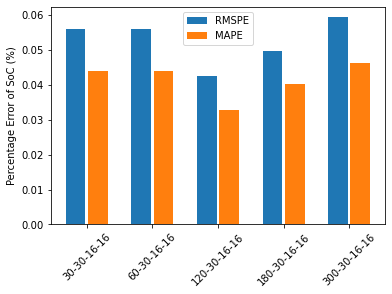

In [95]:
import matplotlib.pyplot as plt

rmspe = [v for v in performance_rmspe.values()]
mape = [v for v in performance_mape.values()]
# accpe = [v for v in performance_accpe.values()]

plt.ylabel('Percentage Error of SoC (%)')
# plt.bar(x - 0.3, rmspe, width, label='RMSPE')
# plt.bar(x, mape, width, label='MAPE')
# plt.bar(x + 0.3, accpe, width, label='AccPE')
plt.bar(x - 0.17, rmspe, width, label='RMSPE')
plt.bar(x + 0.17, mape, width, label='MAPE')
plt.xticks(ticks=x, labels=performance_rmspe.keys(), rotation=45)
_ = plt.legend()